In [331]:
import numpy as np 
import matplotlib.pyplot as plt 

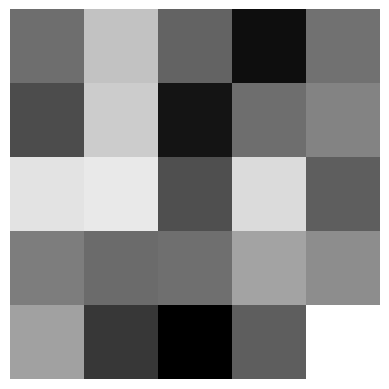

[[102 179  92  14 106]
 [ 71 188  20 102 121]
 [210 214  74 202  87]
 [116  99 103 151 130]
 [149  52   1  87 235]]


In [332]:
matrix = np.random.randint(0, 256, size=(5, 5))
plt.imshow(matrix, cmap='gray')
plt.axis('off')
plt.show()
print(matrix)

# Steps of CNN
### Conv2D, MaxPooling2D, Fully Connected Layer(Flatten, Dense( ReLU, Sigmoid))

In [ ]:
def convolve2d(image, kernel, stride):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    new_image = np.zeros((output_height, output_width)).astype(np.int32)
    for x in range(0, output_width):
        for y in range(0, output_height):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.int32)
    return new_image

In [334]:
def relu(matrix):
    return np.maximum(matrix, 0)

In [335]:
def maxpooling2d(image, pool_size, stride):
    image_height, image_width = image.shape
    output_height = (image_height - pool_size) // stride + 1
    output_width = (image_width - pool_size) // stride + 1
    new_image = np.zeros((output_height, output_width)).astype(np.int32)
    for x in range(0, output_width):
        for y in range(0, output_height):
            new_image[y][x] = np.max(image[y * stride:y * stride + pool_size, x * stride:x * stride + pool_size])
    return new_image

In [336]:
def flatten(matrix):
    return matrix.flatten()

In [337]:
def dense(matrix, weights, sigmoid):
    return sigmoid(np.dot(matrix, weights))

In [338]:
def sigmoid(matrix):
    return (1 / (1 + np.exp(-matrix)))

In [ ]:
matrix = np.array([[2, 0, 2, 3, 1, 0], 
                   [1, 1, 0, 2, 4, 3], 
                   [0, 2, 3, 1, 0, 0], 
                   [4, 0, 0, 3, 0, 1], 
                   [0, 2, 1, 1, 0, 2], 
                   [2, 3, 0, 1, 3, 3], 
                   [0, 0, 2, 1, 0, 0]])
filter = np.array([[1, 3, 1], 
                   [2, 0, 0], 
                   [-1, 1, -2]])
image = convolve2d(matrix, filter, 1)
print("Matrix after Convolution2D:\n",image)
image = relu(image)
# print(image)
image = maxpooling2d(image, pool_size=2, stride=1)
print("Matrix after Max Pooling:\n",image)
image = flatten(image)
print("Matrix after Flatten:\n",image)
weights = np.random.rand(image.shape[0])
output = dense(image, weights, sigmoid)
print("Output: ",output)

Matrix after Convolution2D:
 [[ 2 10 10  9]
 [ 0  1 19 14]
 [17  9  6  2]
 [ 5  2  6  2]
 [ 7 12  3  4]]
Matrix after Max Pooling:
 [[10 19 19]
 [17 19 19]
 [17  9  6]
 [12 12  6]]
Matrix after Flatten:
 [10 19 19 17 19 19 17  9  6 12 12  6]
Output:  1.0


### Just an Example

In [340]:
# Create a 3D matrix of shape (4, 4, 4) with random integers between 0 and 9
matrix_3d = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 0, 1, 2], [3, 4, 5, 6]],
                      [[7, 8, 9, 0], [1, 2, 3, 4], [5, 6, 7, 8], [9, 0, 1, 2]],
                      [[3, 4, 5, 6], [7, 8, 9, 0], [1, 2, 3, 4], [5, 6, 7, 8]],
                      [[9, 0, 1, 2], [3, 4, 5, 6], [7, 8, 9, 0], [1, 2, 3, 4]]])
print(matrix_3d)

matrix_3d.flatten()

[[[1 2 3 4]
  [5 6 7 8]
  [9 0 1 2]
  [3 4 5 6]]

 [[7 8 9 0]
  [1 2 3 4]
  [5 6 7 8]
  [9 0 1 2]]

 [[3 4 5 6]
  [7 8 9 0]
  [1 2 3 4]
  [5 6 7 8]]

 [[9 0 1 2]
  [3 4 5 6]
  [7 8 9 0]
  [1 2 3 4]]]


array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

### Don't yet use this code below

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import Constant

data = matrix.reshape((1, 7, 6, 1))  # 1 sample, 7x6 size, 1 channel

kernel = np.array([[[[1]], [[3]], [[1]]],
                    [[[2]], [[0]], [[0]]],
                    [[[-1]], [[1]], [[-2]]]], dtype=np.float32)

model = Sequential([
    Conv2D(1, kernel_size=(3, 3), activation='linear', input_shape=(7, 6, 1),
           kernel_initializer=Constant(kernel)),
    tf.keras.layers.ReLU(),
    MaxPooling2D(pool_size=(2, 2), strides=1),
    Flatten(),
    Dense(10, activation='linear'),
    tf.keras.layers.ReLU(),
    Dense(1, activation='sigmoid',
          kernel_initializer=Constant([1]))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

output = model.predict(data)
print(output)

Model: "sequential_387"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_394 (Conv2D)             │ (None, 5, 4, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_265 (ReLU)                │ (None, 5, 4, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_388               │ (None, 4, 3, 1)        │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_387 (Flatten)           │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_671 (Dense)               │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_266 (ReLU)                │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_672 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1.]]
